In [1]:
# import needed libraries
import sys
import os 
import pickle
from collections import OrderedDict
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
# path of local project
folder_path = "/home/jiaxiangyi/Documents/rvesimulator"
sys.path.insert(0, folder_path) 

# import local packages and functions 
import rvesimulator 
from rvesimulator.simulators.pnas_sve import PnasSVE
from rvesimulator.design_of_experiment.samplers import FixNumberSampler
from rvesimulator.simulators.path_generator import PathGenerator
from rvesimulator.microstructures.microstructure_plots import PlotRVE2D

In [2]:
# create the doe
# define the design space
doe_variables = OrderedDict({"control_points": 7})

# define number of samples
num_points = 1
# define the information of outputs
name_outputs = ["strain", "stress", "plastic_energy"]
doe_sampler = FixNumberSampler()
doe_sampler.sampling(
    num_samples=num_points,
    design_space=doe_variables,
    out_names=name_outputs,
    seed=123456,
)
data = doe_sampler.data
print(data)

{'samples':    control_points
0             7.0, 'responses':   strain stress plastic_energy
0    NaN    NaN            NaN}


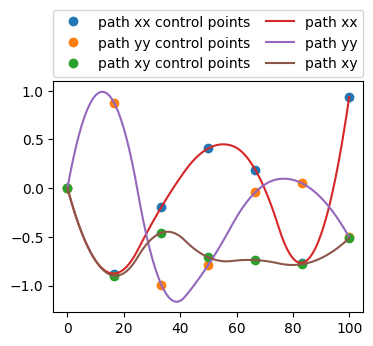

{'samples':    control_points                                         loads_path
0             7.0  [[0.0, -0.10396974454930628, -0.20138298878137..., 'responses':   strain stress plastic_energy
0    NaN    NaN            NaN}


In [3]:
#
loads_path_temp = np.empty([num_points, 1])
loads_path_temp[:] = np.nan
# print(loads_path_temp)
loads_path = pd.DataFrame(loads_path_temp, columns=["loads_path"])
loads_path["loads_path"] = loads_path["loads_path"].astype(object)
# print(loads_path)

# define the path generator
for ii in range(num_points):
    path_generator = PathGenerator(num_control_points=data["samples"].at[ii, "control_points"])   
    loads_path.iloc[ii, 0] = path_generator.quadratic_interpolate()
    path_generator.plot_path()

# add the loads path to the samples
data["samples"] = pd.concat(
    [data["samples"], loads_path], axis=1, join="inner"
)
print(data)

## radius 1 
- radius=0.05


The simulation information is : {'location_information': [[0.25, 0.75, 1], [0.75, 0.25, 1]], 'len_start': -0.05, 'len_end': 1.05, 'wid_start': -0.05, 'wid_end': 1.05, 'radius': 0.05, 'E_matrix': 100.0, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.5316978638492222, 0.541825582103651, 0.5491901897169873, 0.5551891864584486, 0.5603417633654516, 0.5649068444639842, 0.5690349813196016, 0.5728225681210433, 0.5763355781923636, 0.5796214341106994, 0.5827155324558011, 0.585645094733533, 0.5884315702256371, 0.5910922039712734, 0.5936410984009242, 0.5960899547185146, 0.5984486044506366, 0.6007253992982465, 0.6029275027715475, 0.6050611121761507, 0.6071316302061533, 0.6091437994192216, 0.6111018089314695, 0.6130093800197907, 0.6148698354997035, 0.616686156474797, 0.6184610291500892, 0.6201968837498333, 0.6218959271038169, 0.6235601701134824, 0.6251914510450486, 0.6267914553968891, 0.6283617329355872, 0.6299037123771667, 0.6314187140982368, 0.6329079611897948, 0.6343725891095284, 0.635813654143

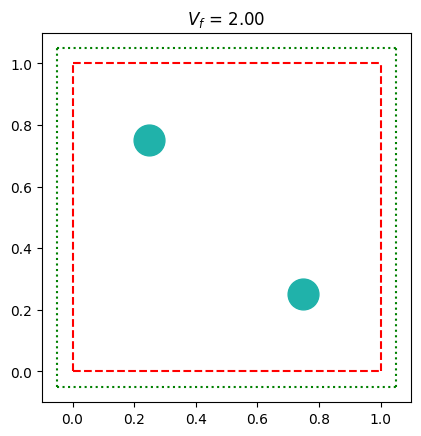

In [4]:
simulation_wrapper = PnasSVE()
simulation_wrapper.update_sim_info(loads=[0.03, 0.03, 0.03], mesh_partition=80, radius= 0.05, benchmark="benchmark_1", print_info=True)
# plot the micro_structure 
location_info = simulation_wrapper.sim_info["location_information"] 
location_info = np.array(location_info) 
PlotRVE2D.cricle_inclusion_plot(circle_position=location_info,
radius=simulation_wrapper.sim_info["radius"], 
len_start=simulation_wrapper.sim_info["len_start"],
len_end = simulation_wrapper.sim_info["len_end"], 
wid_start=simulation_wrapper.sim_info["wid_start"], 
wid_end = simulation_wrapper.sim_info["wid_end"],
vol_frac=0.02 
 )

In [5]:
simulation_wrapper.run_simulation(data=data.copy(), save_source_files=False)
simulation_wrapper.save_data("radius_1.pickle")


Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/statistic_rve/different_radius/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<14 out of 30 licenses remain available>.


the simulation time is :40.007776975631714 !
the simulation time is :60.01967763900757 !
the simulation time is :80.01970314979553 !
the simulation time is :100.01976990699768 !
the simulation time is :120.01983761787415 !
the simulation time is :140.01994156837463 !
the simulation time is :160.01994466781616 !
the simulation time is :180.01974487304688 !
the simulation time is :200.01973605155945 !
the simulation time is :220.02016186714172 !
the simulation time is :240.01987957954407 !
the simulation time is :260.0202498435974 !
the simulation time is :280.02085542678833 !
the simulation time is :300.0204417705536 !
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 320.07847476005554
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<15 out of 30 licenses remain available>.


## radius 2
- radius=0.10

The simulation information is : {'location_information': [[0.25, 0.75, 1], [0.75, 0.25, 1]], 'len_start': -0.1, 'len_end': 1.1, 'wid_start': -0.1, 'wid_end': 1.1, 'radius': 0.1, 'E_matrix': 100.0, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.5316978638492222, 0.541825582103651, 0.5491901897169873, 0.5551891864584486, 0.5603417633654516, 0.5649068444639842, 0.5690349813196016, 0.5728225681210433, 0.5763355781923636, 0.5796214341106994, 0.5827155324558011, 0.585645094733533, 0.5884315702256371, 0.5910922039712734, 0.5936410984009242, 0.5960899547185146, 0.5984486044506366, 0.6007253992982465, 0.6029275027715475, 0.6050611121761507, 0.6071316302061533, 0.6091437994192216, 0.6111018089314695, 0.6130093800197907, 0.6148698354997035, 0.616686156474797, 0.6184610291500892, 0.6201968837498333, 0.6218959271038169, 0.6235601701134824, 0.6251914510450486, 0.6267914553968891, 0.6283617329355872, 0.6299037123771667, 0.6314187140982368, 0.6329079611897948, 0.6343725891095284, 0.635813654143156, 

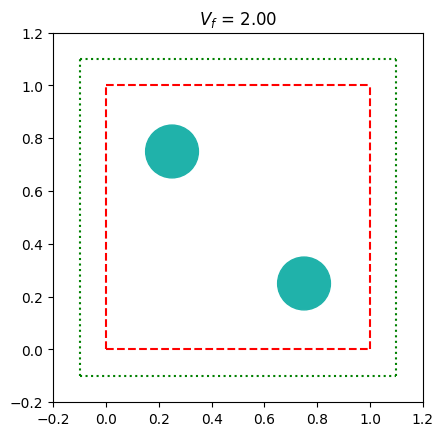

In [6]:
simulation_wrapper.update_sim_info(loads=[0.03, 0.03, 0.03], mesh_partition=80, radius= 0.10, benchmark="benchmark_1", print_info=True)
# plot the micro_structure 
location_info = simulation_wrapper.sim_info["location_information"] 
location_info = np.array(location_info) 
PlotRVE2D.cricle_inclusion_plot(circle_position=location_info,
radius=simulation_wrapper.sim_info["radius"], 
len_start=simulation_wrapper.sim_info["len_start"],
len_end = simulation_wrapper.sim_info["len_end"], 
wid_start=simulation_wrapper.sim_info["wid_start"], 
wid_end = simulation_wrapper.sim_info["wid_end"],
vol_frac=0.02 
 )

In [7]:
simulation_wrapper.run_simulation(data=data.copy(), save_source_files=False)
simulation_wrapper.save_data("radius_2.pickle")

remove results succesfully 

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/statistic_rve/different_radius/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<15 out of 30 licenses remain available>.


the simulation time is :40.01033163070679 !
the simulation time is :60.0200834274292 !
the simulation time is :80.02017426490784 !
the simulation time is :100.02012538909912 !
the simulation time is :120.02025413513184 !
the simulation time is :140.02006101608276 !
the simulation time is :160.0204005241394 !
the simulation time is :180.02044439315796 !
the simulation time is :200.0204405784607 !
the simulation time is :220.02050828933716 !
the simulation time is :240.0205533504486 !
the simulation time is :260.0203378200531 !
the simulation time is :280.0208706855774 !
the simulation time is :300.02034401893616 !
the simulation time is :320.020414352417 !
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 340.0900123119354
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an e

Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<16 out of 30 licenses remain available>.


## radius 3 
- radius=0.15

The simulation information is : {'location_information': [[0.25, 0.75, 1], [0.75, 0.25, 1]], 'len_start': -0.15, 'len_end': 1.15, 'wid_start': -0.15, 'wid_end': 1.15, 'radius': 0.15, 'E_matrix': 100.0, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.5316978638492222, 0.541825582103651, 0.5491901897169873, 0.5551891864584486, 0.5603417633654516, 0.5649068444639842, 0.5690349813196016, 0.5728225681210433, 0.5763355781923636, 0.5796214341106994, 0.5827155324558011, 0.585645094733533, 0.5884315702256371, 0.5910922039712734, 0.5936410984009242, 0.5960899547185146, 0.5984486044506366, 0.6007253992982465, 0.6029275027715475, 0.6050611121761507, 0.6071316302061533, 0.6091437994192216, 0.6111018089314695, 0.6130093800197907, 0.6148698354997035, 0.616686156474797, 0.6184610291500892, 0.6201968837498333, 0.6218959271038169, 0.6235601701134824, 0.6251914510450486, 0.6267914553968891, 0.6283617329355872, 0.6299037123771667, 0.6314187140982368, 0.6329079611897948, 0.6343725891095284, 0.635813654143

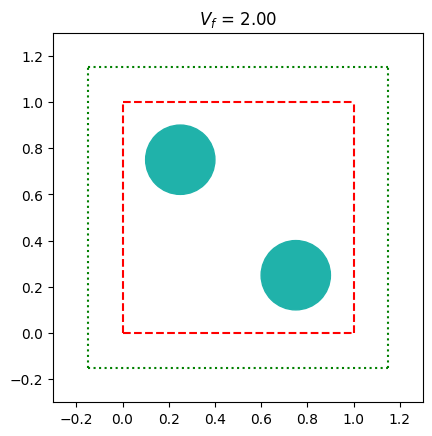

In [8]:
simulation_wrapper.update_sim_info(loads=[0.03, 0.03, 0.03], mesh_partition=80, radius= 0.15, benchmark="benchmark_1", print_info=True)
# plot the micro_structure 
location_info = simulation_wrapper.sim_info["location_information"] 
location_info = np.array(location_info) 
PlotRVE2D.cricle_inclusion_plot(circle_position=location_info,
radius=simulation_wrapper.sim_info["radius"], 
len_start=simulation_wrapper.sim_info["len_start"],
len_end = simulation_wrapper.sim_info["len_end"], 
wid_start=simulation_wrapper.sim_info["wid_start"], 
wid_end = simulation_wrapper.sim_info["wid_end"],
vol_frac=0.02 )

In [9]:
simulation_wrapper.run_simulation(data=data.copy(), save_source_files=False)
simulation_wrapper.save_data("radius_3.pickle")

remove results succesfully 

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/statistic_rve/different_radius/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<16 out of 30 licenses remain available>.


the simulation time is :40.00930738449097 !
the simulation time is :60.01736283302307 !
the simulation time is :80.01745390892029 !
the simulation time is :100.0174708366394 !
the simulation time is :120.01752853393555 !
the simulation time is :140.0176682472229 !
the simulation time is :160.017724275589 !
the simulation time is :180.01779460906982 !
the simulation time is :200.01868271827698 !
the simulation time is :220.01789951324463 !
the simulation time is :240.01757740974426 !
the simulation time is :260.0179524421692 !
the simulation time is :280.0211639404297 !
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 300.0939476490021
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<17 out of 30 licenses remain available>.


## radius 4 
- radius=0.20

The simulation information is : {'location_information': [[0.25, 0.75, 1], [0.75, 0.25, 1]], 'len_start': -0.2, 'len_end': 1.2, 'wid_start': -0.2, 'wid_end': 1.2, 'radius': 0.2, 'E_matrix': 100.0, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.5316978638492222, 0.541825582103651, 0.5491901897169873, 0.5551891864584486, 0.5603417633654516, 0.5649068444639842, 0.5690349813196016, 0.5728225681210433, 0.5763355781923636, 0.5796214341106994, 0.5827155324558011, 0.585645094733533, 0.5884315702256371, 0.5910922039712734, 0.5936410984009242, 0.5960899547185146, 0.5984486044506366, 0.6007253992982465, 0.6029275027715475, 0.6050611121761507, 0.6071316302061533, 0.6091437994192216, 0.6111018089314695, 0.6130093800197907, 0.6148698354997035, 0.616686156474797, 0.6184610291500892, 0.6201968837498333, 0.6218959271038169, 0.6235601701134824, 0.6251914510450486, 0.6267914553968891, 0.6283617329355872, 0.6299037123771667, 0.6314187140982368, 0.6329079611897948, 0.6343725891095284, 0.635813654143156, 

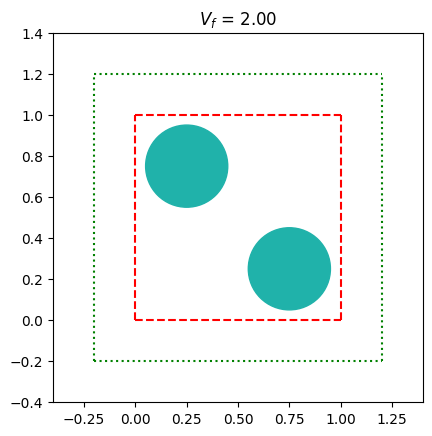

In [10]:

simulation_wrapper.update_sim_info(loads=[0.03, 0.03, 0.03], mesh_partition=80, radius= 0.20, benchmark="benchmark_1", print_info=True)
# plot the micro_structure 
location_info = simulation_wrapper.sim_info["location_information"] 
location_info = np.array(location_info) 
PlotRVE2D.cricle_inclusion_plot(circle_position=location_info,
radius=simulation_wrapper.sim_info["radius"], 
len_start=simulation_wrapper.sim_info["len_start"],
len_end = simulation_wrapper.sim_info["len_end"], 
wid_start=simulation_wrapper.sim_info["wid_start"], 
wid_end = simulation_wrapper.sim_info["wid_end"],
vol_frac=0.02 
 )

In [11]:
simulation_wrapper.run_simulation(data=data.copy(), save_source_files=False)
simulation_wrapper.save_data("radius_4.pickle")

remove results succesfully 

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/statistic_rve/different_radius/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.


the simulation time is :40.0093469619751 !
the simulation time is :60.01702356338501 !
the simulation time is :80.01708626747131 !
the simulation time is :100.01722145080566 !
the simulation time is :120.00194120407104 !
the simulation time is :140.01930141448975 !
the simulation time is :160.0173888206482 !
the simulation time is :180.01765394210815 !
the simulation time is :200.0193727016449 !
the simulation time is :220.01792430877686 !
the simulation time is :240.01781940460205 !
the simulation time is :260.01767802238464 !
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 280.07864785194397
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<17 out of 30 licenses remain available>.


# plot all results together 

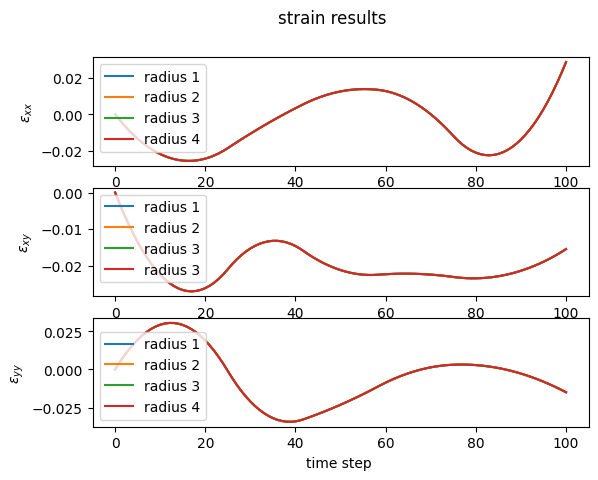

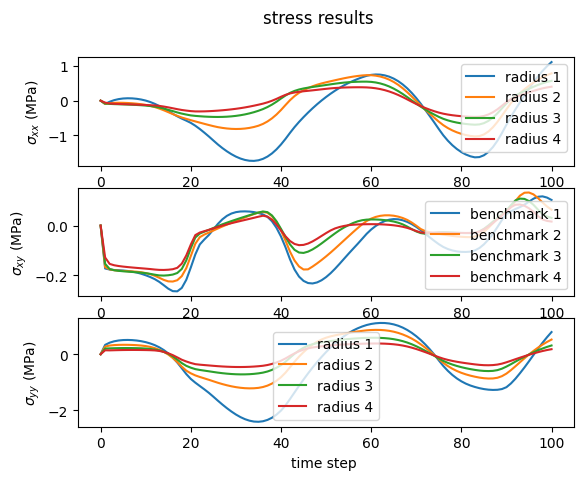

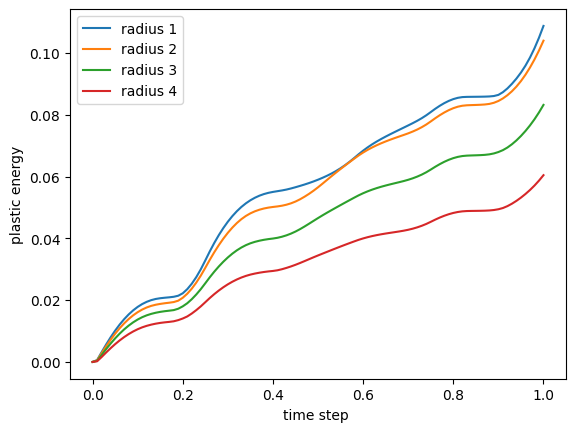

In [12]:
# os.chdir('Data/')
with open("radius_1.pickle", "rb") as fd:
    benchmark_1 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("radius_2.pickle", "rb") as fd:
    benchmark_2 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("radius_3.pickle", "rb") as fd:
    benchmark_3 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("radius_4.pickle", "rb") as fd:
    benchmark_4 = pickle.load(fd, fix_imports=True, encoding="latin1")

results_1 =benchmark_1["responses"]
results_2 =benchmark_2["responses"]
results_3 =benchmark_3["responses"]
results_4 =benchmark_4["responses"]
# result of benchmark1
stress_1 = results_1["stress"].iloc[0]
strain_1 = results_1["strain"].iloc[0]
plastic_energy_1 = results_1["plastic_energy"].iloc[0]
# result of benchmark2
stress_2 = results_2["stress"].iloc[0]
strain_2 = results_2["strain"].iloc[0]
plastic_energy_2 = results_2["plastic_energy"].iloc[0]

# result of benchmark3
stress_3 = results_3["stress"].iloc[0]
strain_3 = results_3["strain"].iloc[0]
plastic_energy_3 = results_3["plastic_energy"].iloc[0]

# result of benchmark4
stress_4 = results_4["stress"].iloc[0]
strain_4 = results_4["strain"].iloc[0]
plastic_energy_4 = results_4["plastic_energy"].iloc[0]


pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xx}$")
fig, ax = plt.subplots(3,1)
ax[0].plot(strain_1[:, 0, 0], label="radius 1") 
ax[0].plot(strain_2[:, 0, 0], label="radius 2") 
ax[0].plot(strain_3[:, 0, 0], label="radius 3") 
ax[0].plot(strain_4[:, 0, 0], label="radius 4") 
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xy}$")
ax[1].plot(strain_1[:, 0, 1], label="radius 1")
ax[1].plot(strain_2[:, 0, 1], label="radius 2")
ax[1].plot(strain_3[:, 0, 1], label="radius 3")
ax[1].plot(strain_4[:, 0, 1], label="radius 3")
ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{yy}$")
ax[2].plot(strain_1[:, 1, 1], label="radius 1") 
ax[2].plot(strain_2[:, 1, 1], label="radius 2") 
ax[2].plot(strain_3[:, 1, 1], label="radius 3") 
ax[2].plot(strain_4[:, 1, 1], label="radius 4") 
ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('strain results')
plt.savefig('strain.png', dpi=300)

pparam = dict(xlabel='time step ', ylabel="$\sigma_{xx}$ (MPa)")
fig, ax = plt.subplots(3,1)
ax[0].plot(stress_1[:, 0, 0], label="radius 1") 
ax[0].plot(stress_2[:, 0, 0], label="radius 2") 
ax[0].plot(stress_3[:, 0, 0], label="radius 3") 
ax[0].plot(stress_4[:, 0, 0], label="radius 4") 
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{xy}$ (MPa)")
ax[1].plot(stress_1[:, 1, 0], label="benchmark 1")
ax[1].plot(stress_2[:, 1, 0], label="benchmark 2")
ax[1].plot(stress_3[:, 1, 0], label="benchmark 3")
ax[1].plot(stress_4[:, 1, 0], label="benchmark 4")
ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{yy}$ (MPa)")
ax[2].plot(stress_1[:, 1, 1], label="radius 1") 
ax[2].plot(stress_2[:, 1, 1], label="radius 2") 
ax[2].plot(stress_3[:, 1, 1], label="radius 3") 
ax[2].plot(stress_4[:, 1, 1], label="radius 4") 
ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('stress results')
# plt.show()
plt.savefig('stress.png', dpi=300)


pparam = dict(xlabel='time step ', ylabel="plastic energy")
fig, ax = plt.subplots()
ax.plot(plastic_energy_1[:,0], plastic_energy_1[:,1], label="radius 1") 
ax.plot(plastic_energy_2[:,0], plastic_energy_2[:,1], label="radius 2") 
ax.plot(plastic_energy_3[:,0], plastic_energy_3[:,1], label="radius 3") 
ax.plot(plastic_energy_4[:,0], plastic_energy_4[:,1], label="radius 4") 
ax.legend()
ax.set(**pparam)
plt.savefig('energy.png', dpi=300)